# Wrangling Steps

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

## Injestion

In [2]:
# Ingest csv files
household_florida = pd.read_csv('psam_h12.csv')
print("Household Florida imported")
household_maryland = pd.read_csv('psam_h24.csv')
print("Household Maryland imported")
persons_florida = pd.read_csv('psam_p12.csv')
print("Persons Florida imported")
persons_maryland = pd.read_csv('psam_p24.csv')
print("Persons Maryland imported")

Household Florida imported
Household Maryland imported
Persons Florida imported
Persons Maryland imported


In [3]:
# Inspect the Shapes
print(household_florida.shape)
print(household_maryland.shape)
print(persons_florida.shape)
print(persons_maryland.shape)

(103084, 241)
(28847, 241)
(202883, 287)
(62853, 287)


In [4]:
# Inspect the household columns
print(list(household_florida))

['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG', 'ADJINC', 'WGTP', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'ACR', 'AGS', 'BATH', 'BDSP', 'BLD', 'BROADBND', 'COMPOTHX', 'CONP', 'DIALUP', 'ELEFP', 'ELEP', 'FS', 'FULFP', 'FULP', 'GASFP', 'GASP', 'HFL', 'HISPEED', 'HOTWAT', 'INSP', 'LAPTOP', 'MHP', 'MRGI', 'MRGP', 'MRGT', 'MRGX', 'OTHSVCEX', 'REFR', 'RMSP', 'RNTM', 'RNTP', 'RWAT', 'RWATPR', 'SATELLITE', 'SINK', 'SMARTPHONE', 'SMP', 'STOV', 'TABLET', 'TEL', 'TEN', 'VACDUR', 'VACOTH', 'VACS', 'VALP', 'VEH', 'WATFP', 'WATP', 'YRBLT', 'CPLT', 'FINCP', 'FPARC', 'GRNTP', 'GRPIP', 'HHL', 'HHLANP', 'HHLDRAGEP', 'HHLDRHISP', 'HHLDRRAC1P', 'HHT', 'HHT2', 'HINCP', 'HUGCL', 'HUPAC', 'HUPAOC', 'HUPARC', 'KIT', 'LNGI', 'MULTG', 'MV', 'NOC', 'NPF', 'NPP', 'NR', 'NRC', 'OCPIP', 'PARTNER', 'PLM', 'PLMPRP', 'PSF', 'R18', 'R60', 'R65', 'RESMODE', 'SMOCP', 'SMX', 'SRNT', 'SVAL', 'TAXAMT', 'WIF', 'WKEXREL', 'WORKSTAT', 'FACCESSP', 'FACRP', 'FAGSP', 'FBATHP', 'FBDSP', 'FBLDP', 'FBROADBNDP', 'FCOMPOTHXP'

In [5]:
# Inspect the persons columns
print(list(persons_florida))

['RT', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST', 'ADJINC', 'PWGTP', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DRAT', 'DRATX', 'DREM', 'ENG', 'FER', 'GCL', 'GCM', 'GCR', 'HIMRKS', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'INTP', 'JWMNP', 'JWRIP', 'JWTRNS', 'LANX', 'MAR', 'MARHD', 'MARHM', 'MARHT', 'MARHW', 'MARHYP', 'MIG', 'MIL', 'MLPA', 'MLPB', 'MLPCD', 'MLPE', 'MLPFG', 'MLPH', 'MLPIK', 'MLPJ', 'NWAB', 'NWAV', 'NWLA', 'NWLK', 'NWRE', 'OIP', 'PAP', 'RELSHIPP', 'RETP', 'SCH', 'SCHG', 'SCHL', 'SEMP', 'SEX', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'WKL', 'WKWN', 'WRK', 'YOEP', 'ANC', 'ANC1P', 'ANC2P', 'DECADE', 'DIS', 'DRIVESP', 'ESP', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'HISP', 'INDP', 'JWAP', 'JWDP', 'LANP', 'MIGPUMA', 'MIGSP', 'MSP', 'NAICSP', 'NATIVITY', 'NOP', 'OC', 'OCCP', 'PAOC', 'PERNP', 'PINCP', 'POBP', 'POVPIP', 'POWPUMA', 'POWSP', 'PRIVCOV', 'PUBCOV', 'QTRBIR', 'RAC1P', 'RAC2P', 'RAC3P', 'RACAIAN', 'RACASN', 'RACBLK', 'RA

## Add unique identifier for Persons Dataset

In [6]:
# Add unique serial-person IDs for persons datasets
def add_snsp(persons):
    PFL_rows = persons.shape[0]  # Row length
    persons['SNSP'] = 'N/A'  # New Empty Column
    
    # Get indexes
    serial_index = persons.columns.get_loc('SERIALNO')
    sp_index = persons.columns.get_loc('SPORDER')
    snsp_index = persons.columns.get_loc('SNSP')
    
    # ID Population of column using iloc
    for rowNum in range(PFL_rows):
        serialN = str(persons.iloc[rowNum, serial_index])
        sporder = str(persons.iloc[rowNum, sp_index])
        new_Value = serialN + '_' + sporder
        persons.iloc[rowNum, snsp_index] = new_Value  # Place new value at dataframe location
    
    persons.insert(1, 'SNSP', persons.pop('SNSP'))  # Move column to second position

In [7]:
# Use functions to modify datasets
add_snsp(persons_florida)
add_snsp(persons_maryland)

In [8]:
# Print new shape
print(persons_florida.shape)
print(persons_maryland.shape)

# Check list of columns
print()
print(list(persons_florida))

# Check the SNSP column itself
print(persons_florida.SNSP)

(202883, 288)
(62853, 288)

['RT', 'SNSP', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST', 'ADJINC', 'PWGTP', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DRAT', 'DRATX', 'DREM', 'ENG', 'FER', 'GCL', 'GCM', 'GCR', 'HIMRKS', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'INTP', 'JWMNP', 'JWRIP', 'JWTRNS', 'LANX', 'MAR', 'MARHD', 'MARHM', 'MARHT', 'MARHW', 'MARHYP', 'MIG', 'MIL', 'MLPA', 'MLPB', 'MLPCD', 'MLPE', 'MLPFG', 'MLPH', 'MLPIK', 'MLPJ', 'NWAB', 'NWAV', 'NWLA', 'NWLK', 'NWRE', 'OIP', 'PAP', 'RELSHIPP', 'RETP', 'SCH', 'SCHG', 'SCHL', 'SEMP', 'SEX', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'WKL', 'WKWN', 'WRK', 'YOEP', 'ANC', 'ANC1P', 'ANC2P', 'DECADE', 'DIS', 'DRIVESP', 'ESP', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'HISP', 'INDP', 'JWAP', 'JWDP', 'LANP', 'MIGPUMA', 'MIGSP', 'MSP', 'NAICSP', 'NATIVITY', 'NOP', 'OC', 'OCCP', 'PAOC', 'PERNP', 'PINCP', 'POBP', 'POVPIP', 'POWPUMA', 'POWSP', 'PRIVCOV', 'PUBCOV', 'QTRBIR', 'RAC1P', 'RAC2P', 'RAC3P'

## Wrangling (Checking for Duplicates, Purging Columns, Merging)

In [9]:
# Checking for Dupes
Dupes = household_florida.SERIALNO.duplicated()
print(Dupes[Dupes == True])

Dupes = household_maryland.SERIALNO.duplicated()
print(Dupes[Dupes == True])

Dupes = persons_florida.SNSP.duplicated()
print(Dupes[Dupes == True])

Dupes = persons_maryland.SNSP.duplicated()
print(Dupes[Dupes == True])

Series([], Name: SERIALNO, dtype: bool)
Series([], Name: SERIALNO, dtype: bool)
Series([], Name: SNSP, dtype: bool)
Series([], Name: SNSP, dtype: bool)


In [10]:
# Lists of columns needed for analysis
household_col = [
    'RT', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'BATH', 'BROADBND', 
    'ELEP', 'FS', 'HFL', 'HISPEED', 'INSP', 'REFR', 'SMARTPHONE', 'TABLET', 'TEL', 'TEN', 'VALP', 'VEH', 'FPARC', 'HHLDRAGEP', 
    'HINCP', 'HUGCL', 'KIT', 'MULTG', 'PLM', 'R65', 'WIF'
]

persons_col = [
    'RT', 'SNSP', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 
    'DEYE', 'DOUT', 'DPHY', 'DERM', 'ENG', 'FER', 'JWMNP', 'JWRIP', 'JWTRNS', 'MAR', 'MIL', 'SCH', 'SCHL', 'SEX', 'WAGP', 
    'DIS', 'ESP', 'ESR', 'JWAP', 'NATIVITY', 'NOP', 'OC', 'RAC1P', 'HIMRKS', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 
    'HINS6', 'HINS7', 'HICOV'
]

In [11]:
# Go through columns for each dataset and remove anything not found in these lists
allColumns = list(household_florida)
for column in allColumns:
    if column not in household_col:
        household_florida = household_florida.drop([column], axis=1)

print(list(household_florida))

allColumns = list(household_maryland)
for column in allColumns:
    if column not in household_col:
        household_maryland = household_maryland.drop([column], axis=1)

print(list(household_maryland))

allColumns = list(persons_florida)
for column in allColumns:
    if column not in persons_col:
        persons_florida = persons_florida.drop([column], axis=1)

print(list(persons_florida))

allColumns = list(persons_maryland)
for column in allColumns:
    if column not in persons_col:
        persons_maryland = persons_maryland.drop([column], axis=1)

print(list(persons_maryland))

['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'BATH', 'BROADBND', 'ELEP', 'FS', 'HFL', 'HISPEED', 'INSP', 'REFR', 'SMARTPHONE', 'TABLET', 'TEL', 'TEN', 'VALP', 'VEH', 'FPARC', 'HHLDRAGEP', 'HINCP', 'HUGCL', 'KIT', 'MULTG', 'PLM', 'R65', 'WIF']
['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'BATH', 'BROADBND', 'ELEP', 'FS', 'HFL', 'HISPEED', 'INSP', 'REFR', 'SMARTPHONE', 'TABLET', 'TEL', 'TEN', 'VALP', 'VEH', 'FPARC', 'HHLDRAGEP', 'HINCP', 'HUGCL', 'KIT', 'MULTG', 'PLM', 'R65', 'WIF']
['RT', 'SNSP', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'ENG', 'FER', 'HIMRKS', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'JWMNP', 'JWRIP', 'JWTRNS', 'MAR', 'MIL', 'SCH', 'SCHL', 'SEX', 'WAGP', 'DIS', 'ESP', 'ESR', 'HICOV', 'JWAP', 'NATIVITY', 'NOP', 'OC', 'RAC1P']
['RT', 'SNSP', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUM

In [12]:
# Inspect new shapes
print(household_florida.shape)
print(persons_florida.shape)

(103084, 32)
(202883, 45)


In [13]:
# List Household columns that will be used to merge
# Serial Number will be used to match household entries to person entries.
# Other categories are household information that will then be attatched to a person's row.
household_col_merge = [
    'SERIALNO', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'BATH', 'BROADBND', 'ELEP', 'FS', 'HFL', 'HISPEED', 'INSP', 'REFR', 
    'SMARTPHONE', 'TABLET', 'TEL', 'TEN', 'VALP', 'VEH', 'FPARC', 'HHLDRAGEP', 'HINCP', 'HUGCL', 'KIT', 'MULTG', 'PLM', 'R65', 
    'WIF'
]

In [14]:
# Merge datasets
survey_florida = persons_florida.merge(household_florida[household_col_merge])
survey_maryland = persons_maryland.merge(household_maryland[household_col_merge])

print(survey_florida.shape)
print(survey_maryland.shape)

print(list(survey_maryland))

(202883, 71)
(62853, 71)
['RT', 'SNSP', 'SERIALNO', 'DIVISION', 'SPORDER', 'PUMA', 'REGION', 'ST', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'ENG', 'FER', 'HIMRKS', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'JWMNP', 'JWRIP', 'JWTRNS', 'MAR', 'MIL', 'SCH', 'SCHL', 'SEX', 'WAGP', 'DIS', 'ESP', 'ESR', 'HICOV', 'JWAP', 'NATIVITY', 'NOP', 'OC', 'RAC1P', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'BATH', 'BROADBND', 'ELEP', 'FS', 'HFL', 'HISPEED', 'INSP', 'REFR', 'SMARTPHONE', 'TABLET', 'TEL', 'TEN', 'VALP', 'VEH', 'FPARC', 'HHLDRAGEP', 'HINCP', 'HUGCL', 'KIT', 'MULTG', 'PLM', 'R65', 'WIF']


In [15]:
# Concatanate Florida and Maryland data into one giant dataframe
survey_combined = pd.concat([survey_florida, survey_maryland], ignore_index=True)
print(survey_combined.shape)

(265736, 71)


In [16]:
survey_combined

,RT,SNSP,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,AGEP,CIT,...,VEH,FPARC,HHLDRAGEP,HINCP,HUGCL,KIT,MULTG,PLM,R65,WIF
0,P,2021GQ0000025_1,2021GQ0000025,5,1,1108,3,12,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P,2021GQ0000036_1,2021GQ0000036,5,1,8609,3,12,87,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P,2021GQ0000062_1,2021GQ0000062,5,1,904,3,12,18,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P,2021GQ0000064_1,2021GQ0000064,5,1,1104,3,12,78,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P,2021GQ0000070_1,2021GQ0000070,5,1,6300,3,12,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,P,2021HU1415391_2,2021HU1415391,5,2,1107,3,24,71,1,...,2.0,4.0,69.0,216000.0,0.0,1.0,1.0,1.0,2.0,1.0
265732,P,2021HU1415408_1,2021HU1415408,5,1,502,3,24,52,1,...,2.0,NaN,52.0,97000.0,0.0,1.0,1.0,1.0,0.0,NaN
265733,P,2021HU1415408_2,2021HU1415408,5,2,502,3,24,64,1,...,2.0,NaN,52.0,97000.0,0.0,1.0,1.0,1.0,0.0,NaN
265734,P,2021HU1415523_1,2021HU1415523,5,1,1106,3,24,51,1,...,2.0,4.0,51.0,144000.0,0.0,1.0,1.0,1.0,1.0,1.0


In [17]:
# Save Progress
survey_florida.to_csv('survey_florida.csv', index=False)
survey_maryland.to_csv('survey_maryland.csv', index=False)
survey_combined.to_csv('survey_combined.csv', index=False)

# Visualization Steps

## Bar Graph (State Sample Populations)

In [18]:
# Import Libraries
import matplotlib.pyplot as plt

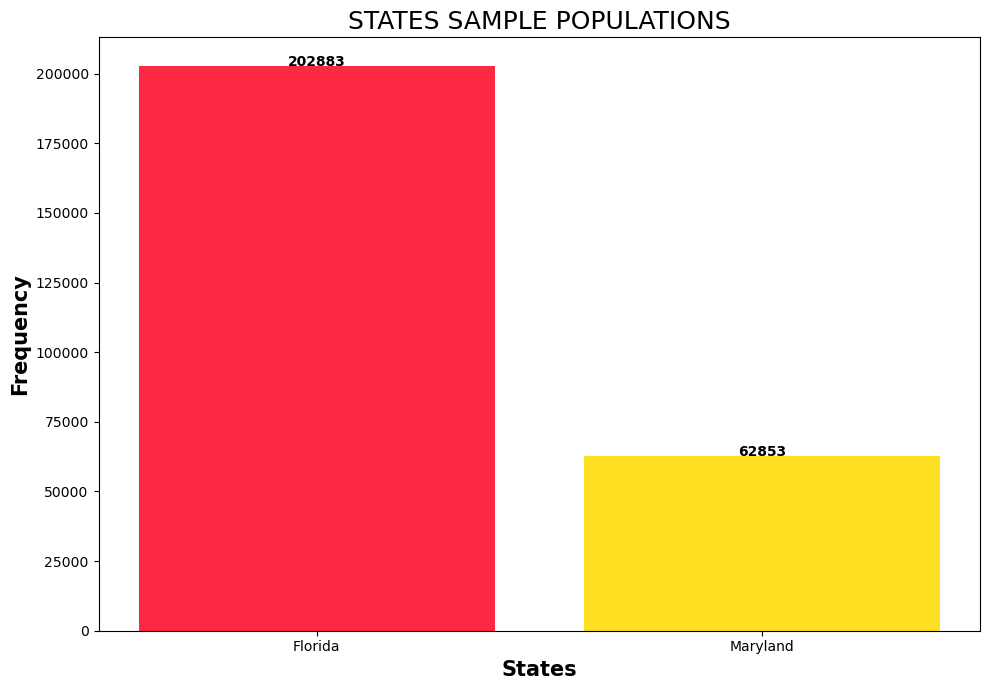

In [19]:
# Labels for columns
stateIndex = ['Florida', 'Maryland']

# Data
stateValues = survey_combined.ST.value_counts().to_numpy()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(stateIndex, stateValues, color=['xkcd:strawberry', 'xkcd:sun yellow'])

# Add data labels
for i in range(len(stateValues)):
    plt.text(i, stateValues[i], stateValues[i], weight='bold', size=10, ha='center')

# Final Formating
plt.xlabel('States', weight='bold', size=15)
plt.ylabel('Frequency', weight='bold', size=15)
plt.title('STATES SAMPLE POPULATIONS', size=18)
plt.tight_layout()
plt.show()

## Pie Charts

In [20]:
# Function for labeling parts of pie charts below
def pieDataLabel(x):
    return '{:.4f}%\n({:.0f})'.format(x, total * x / 100)

### Insured vs Uninsured in Florida

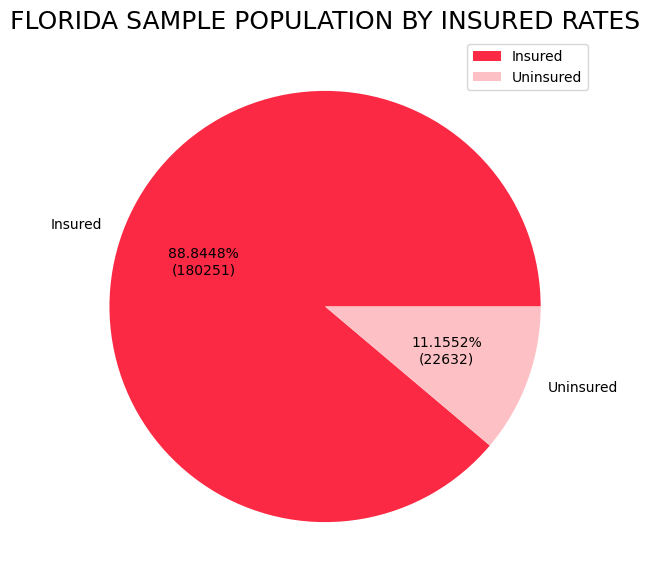

In [21]:
# Pie Chart Labels
hicovIndex = ['Insured', 'Uninsured']

# Data needed
hicovValues = survey_florida.HICOV.value_counts().to_numpy()
total = len(survey_florida.HICOV)

# Create Chart
fig = plt.figure(figsize=(10, 7))

plt.pie(
    hicovValues,
    labels=hicovIndex, 
    autopct=pieDataLabel,  # Data Labels
    colors=['xkcd:strawberry', 'xkcd:pale rose']
)

# Final Formating
plt.title('FLORIDA SAMPLE POPULATION BY INSURED RATES', size=18)
plt.legend()
plt.show()

### Insured vs Uninsured in Maryland

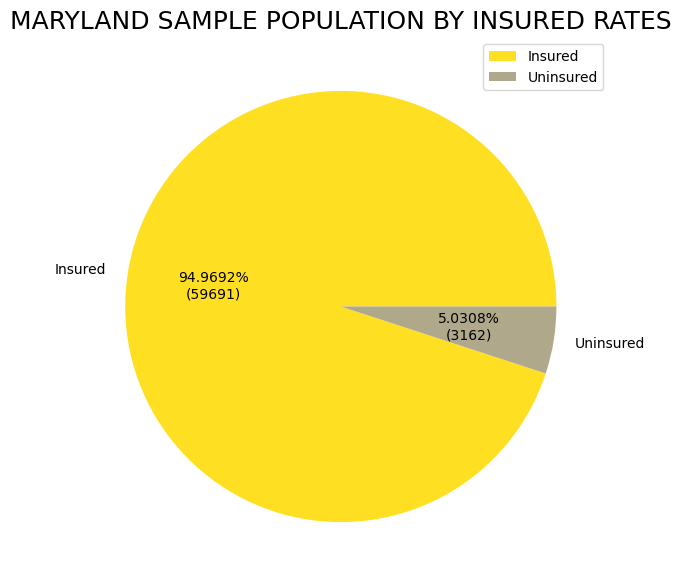

In [22]:
# Pie Chart Labels
hicovIndex = ['Insured', 'Uninsured']

# Data needed
hicovValues = survey_maryland.HICOV.value_counts().to_numpy()
total = len(survey_maryland.HICOV)

# Create Chart
fig = plt.figure(figsize=(10, 7))

plt.pie(
    hicovValues, 
    labels=hicovIndex, 
    autopct=pieDataLabel,  # Data Labels
    colors=['xkcd:sun yellow', 'xkcd:bland']
)

# Final Formating
plt.title('MARYLAND SAMPLE POPULATION BY INSURED RATES', size=18)
plt.legend()
plt.show()

## Getting Insured and Uninsured Sub-datasets

In [23]:
# Uninsured datasets
uninsured_florida = survey_florida[survey_florida.HICOV == 2]
uninsured_maryland = survey_maryland[survey_maryland.HICOV == 2]

# Insured datasets
insured_florida = survey_florida[survey_florida.HICOV == 1]
insured_maryland = survey_maryland[survey_maryland.HICOV == 1]

## Histograms

### Uninsured Rates by Age in Florida

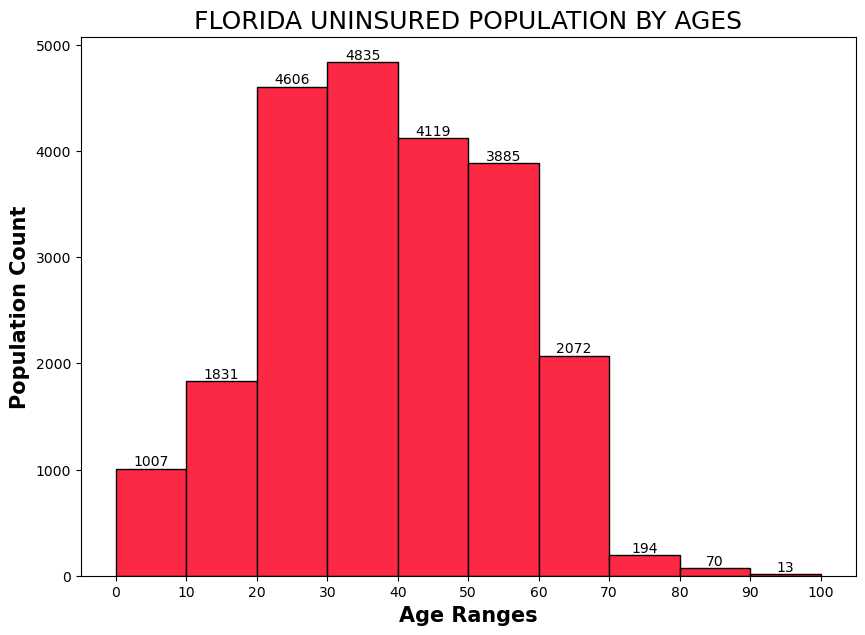

In [24]:
# Data
uninsured_ages = uninsured_florida.AGEP

# Histogram Groupings
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create Histogram
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(x=uninsured_ages, bins=bins, ec='black', color='xkcd:strawberry')
ax.set_xticks(bins)  # Label Bins

# Make Data labels.
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, int(height),
            ha='center', va='bottom')

# Final Formating
plt.xlabel('Age Ranges', weight='bold', size=15)
plt.ylabel('Population Count', weight='bold', size=15)
plt.title('FLORIDA UNINSURED POPULATION BY AGES', size=18)
plt.show()

### Uninsured Rates by Age in Maryland

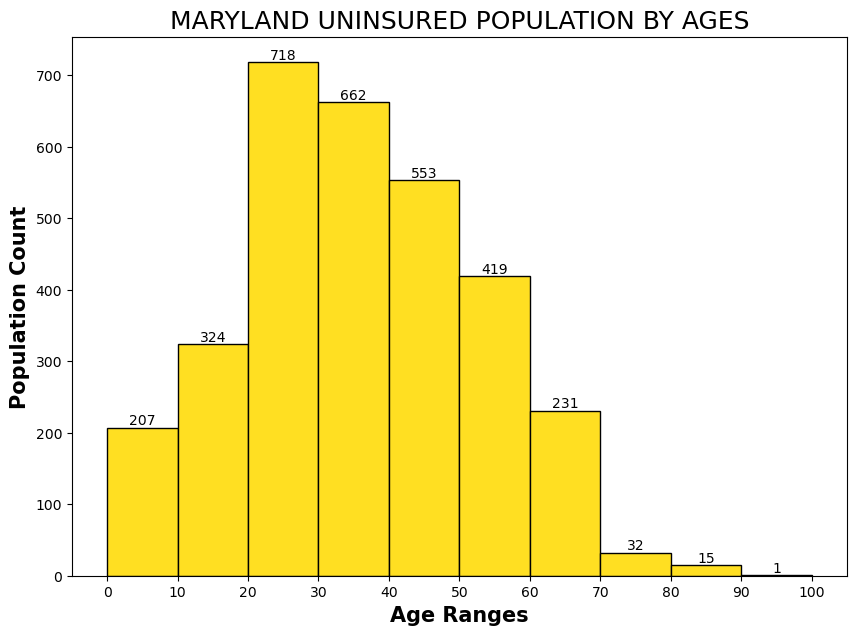

In [25]:
# Data
uninsured_ages = uninsured_maryland.AGEP

# Histogram Groupings
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create Histogram
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(x=uninsured_ages, bins=bins, ec='black', color='xkcd:sun yellow')
ax.set_xticks(bins)  # Label Bins

# Make Data labels.
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, int(height),
            ha='center', va='bottom')

# Final Formating
plt.xlabel('Age Ranges', weight='bold', size=15)
plt.ylabel('Population Count', weight='bold', size=15)
plt.title('MARYLAND UNINSURED POPULATION BY AGES', size=18)
plt.show()

## Stack Plots

In [26]:
# Creating a list of counts for education
def educationList(attainment):
    # Create list to send
    eV = [0] * len(edIndex)

    # Covert null values to 0
    attainment[attainment.isna() == True] = 0

    for item in attainment.items():
        # Set number
        edNum = int(item[1])

        # Check categories
        if edNum == 1:  # No Schooling
            eV[1] += 1
        elif 1 < edNum < 16:  # Kindergarten to 12th grade
            eV[2] += 1
        elif edNum == 16 or edNum == 17:  # High School Diploma / GED
            eV[3] += 1
        elif edNum == 18 or edNum == 19:  # Some Years of College
            eV[4] += 1
        elif edNum == 20:  # Associate's Degree
            eV[5] += 1
        elif edNum == 21:  # Bachelor's Degree
            eV[6] += 1
        elif edNum == 22:  # Master's Degree
            eV[7] += 1
        elif edNum == 23:  # Professional Degree
            eV[8] += 1
        elif edNum == 24:  # Doctorate Degree
            eV[9] += 1
        else:  # Under 3 yrs old or no answer
            eV[0] += 1

    return eV

In [27]:
# List of Categories for Education
edIndex = [
    'N/A', 'No School', 'K-12', 'HS Diploma/GED', 'Some College', 'Associate', 'Bachelors', 'Masters', 'Professional',
    'Doctorate'
]

### Floridians by Educational Attainment

C:\Users\laolu\AppData\Local\Temp\ipykernel_46072\3722180294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attainment[attainment.isna() == True] = 0
C:\Users\laolu\AppData\Local\Temp\ipykernel_46072\3722180294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attainment[attainment.isna() == True] = 0


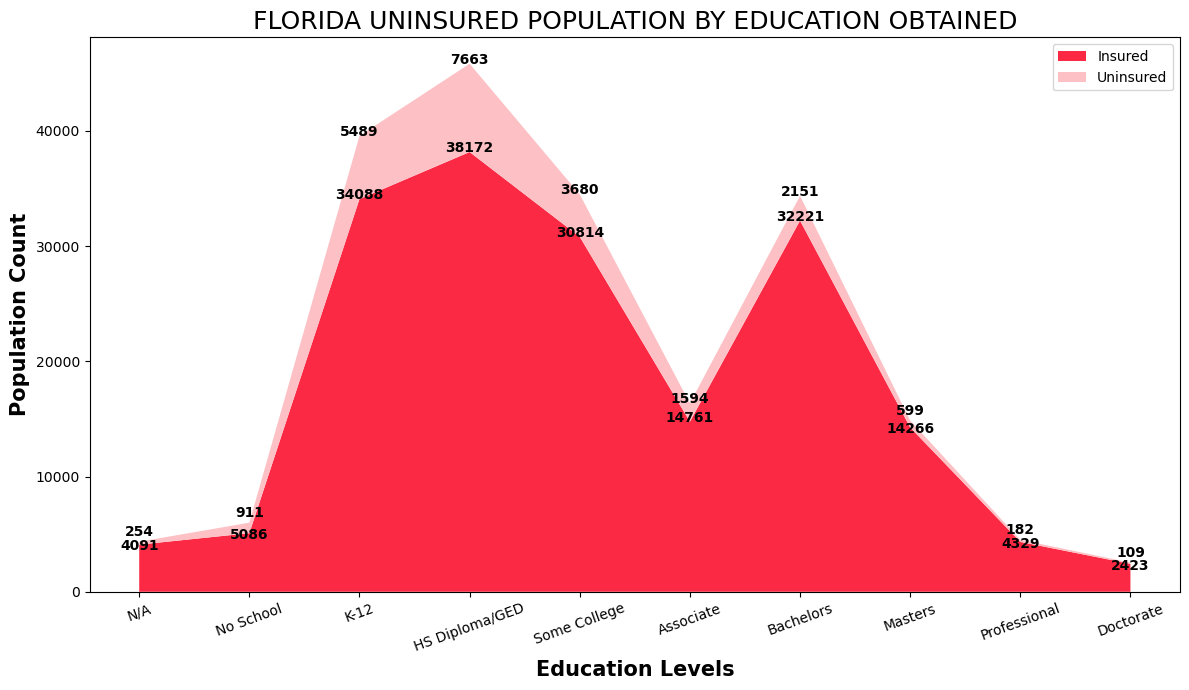

In [28]:
insured_education = insured_florida.SCHL
uninsured_education = uninsured_florida.SCHL

edValue_insured = educationList(insured_education)
edValue_uninsured = educationList(uninsured_education)

fig, ax = plt.subplots(figsize=(12, 7))
ax.stackplot(
    edIndex,
    edValue_insured,
    edValue_uninsured,
    labels=['Insured', 'Uninsured'],
    colors=['xkcd:strawberry', 'xkcd:pale rose']
)

# Make some labels.
for i in range(len(edValue_insured)):
    if edValue_uninsured[i] < 1000:
        buffer = -500
    else:
        buffer = 0

    plt.text(
        i,
        edValue_insured[i] + buffer,
        edValue_insured[i],
        weight='bold',
        size=10,
        ha='center'
    )

for i in range(len(edValue_uninsured)):
    if edValue_uninsured[i] < 1000:
        buffer = 500
    else:
        buffer = 0

    plt.text(
        i,
        edValue_insured[i] + edValue_uninsured[i] + buffer,
        edValue_uninsured[i],
        weight='bold',
        size=10,
        ha='center'
    )

plt.xticks(rotation=20)
plt.xlabel('Education Levels', weight='bold', size=15)
plt.ylabel('Population Count', weight='bold', size=15)
plt.title('FLORIDA UNINSURED POPULATION BY EDUCATION OBTAINED', size=18)
plt.legend()
plt.tight_layout()
plt.show()

### Marylanders by Educational Attainment

C:\Users\laolu\AppData\Local\Temp\ipykernel_46072\3722180294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attainment[attainment.isna() == True] = 0
C:\Users\laolu\AppData\Local\Temp\ipykernel_46072\3722180294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attainment[attainment.isna() == True] = 0


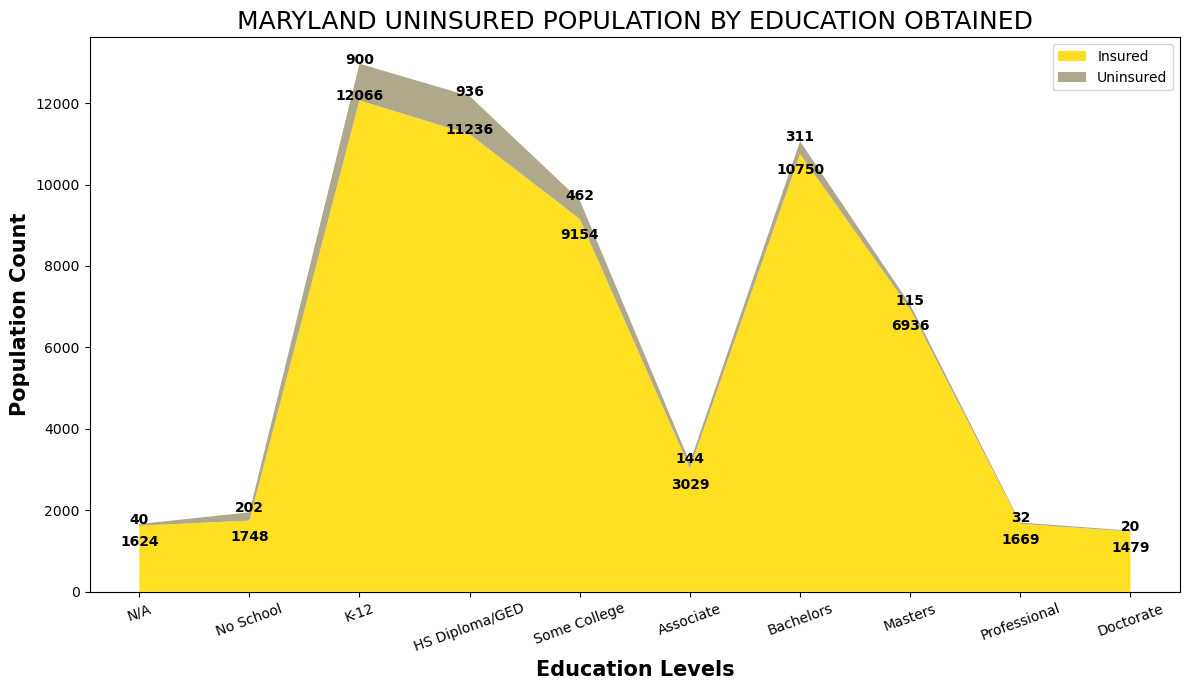

In [29]:
insured_education = insured_maryland.SCHL
uninsured_education = uninsured_maryland.SCHL

edValue_insured = educationList(insured_education)
edValue_uninsured = educationList(uninsured_education)

fig, ax = plt.subplots(figsize=(12, 7))
ax.stackplot(
    edIndex,
    edValue_insured,
    edValue_uninsured,
    labels=['Insured', 'Uninsured'],
    colors=['xkcd:sun yellow', 'xkcd:bland']
)

# Make some labels.
for i in range(len(edValue_insured)):
    if edValue_uninsured[i] < 500:
        buffer = -500
    else:
        buffer = 0

    plt.text(
        i,
        edValue_insured[i] + buffer,
        edValue_insured[i],
        weight='bold',
        size=10,
        ha='center'
    )

for i in range(len(edValue_uninsured)):
    plt.text(
        i,
        edValue_insured[i] + edValue_uninsured[i],
        edValue_uninsured[i],
        weight='bold',
        size=10,
        ha='center'
    )

plt.xticks(rotation=20)
plt.xlabel('Education Levels', weight='bold', size=15)
plt.ylabel('Population Count', weight='bold', size=15)
plt.title('MARYLAND UNINSURED POPULATION BY EDUCATION OBTAINED', size=18)
plt.legend()
plt.tight_layout()
plt.show()